# <b><span style="color:red">Dataset Exploration</span></b>

#### In this notebook, an exploration of the given data is conducted. It encompasses an examination of the total number of images, their heights, widths, aspect ratios, and the relationships between them.

In [2]:
#importing the required libraries
import os
import matplotlib.pyplot as plt
import cv2
import seaborn as sns
import numpy as np
dataset_path=(os.path.join('../project_files','data'))


In [3]:
#get all the font classes inside the data folder
folders=[folder for folder in os.listdir(dataset_path) if folder != '.DS_Store']
print(f'Total number of font classes in the data folder: {len(folders)}')
print(folders)

Total number of font classes in the data folder: 10
['AlexBrush', 'I Love Glitter', 'Holligate Signature', 'Canterbury', 'AguafinaScript', 'James Fajardo', 'GreatVibes', 'Allura', 'alsscrp', 'OpenSans']


In [4]:
#get the number of images in each font folder
total_images=0
for folder in folders:
    num_images=len(os.listdir(os.path.join(dataset_path,folder)))
    print(f'Num images in {folder}: {num_images}')
    total_images+=num_images
print('*' * 50)
print(f'Total number of images: {total_images}')

Num images in AlexBrush: 83
Num images in I Love Glitter: 77
Num images in Holligate Signature: 87
Num images in Canterbury: 81
Num images in AguafinaScript: 88
Num images in James Fajardo: 85
Num images in GreatVibes: 81
Num images in Allura: 75
Num images in alsscrp: 107
Num images in OpenSans: 78
**************************************************
Total number of images: 842


### Observations ###
    - Given dataset is very small, we can use transfer learning while training the model
    - Image augmention can be done to increase the number of images
    - More  sythetic images can be genrated using the font files

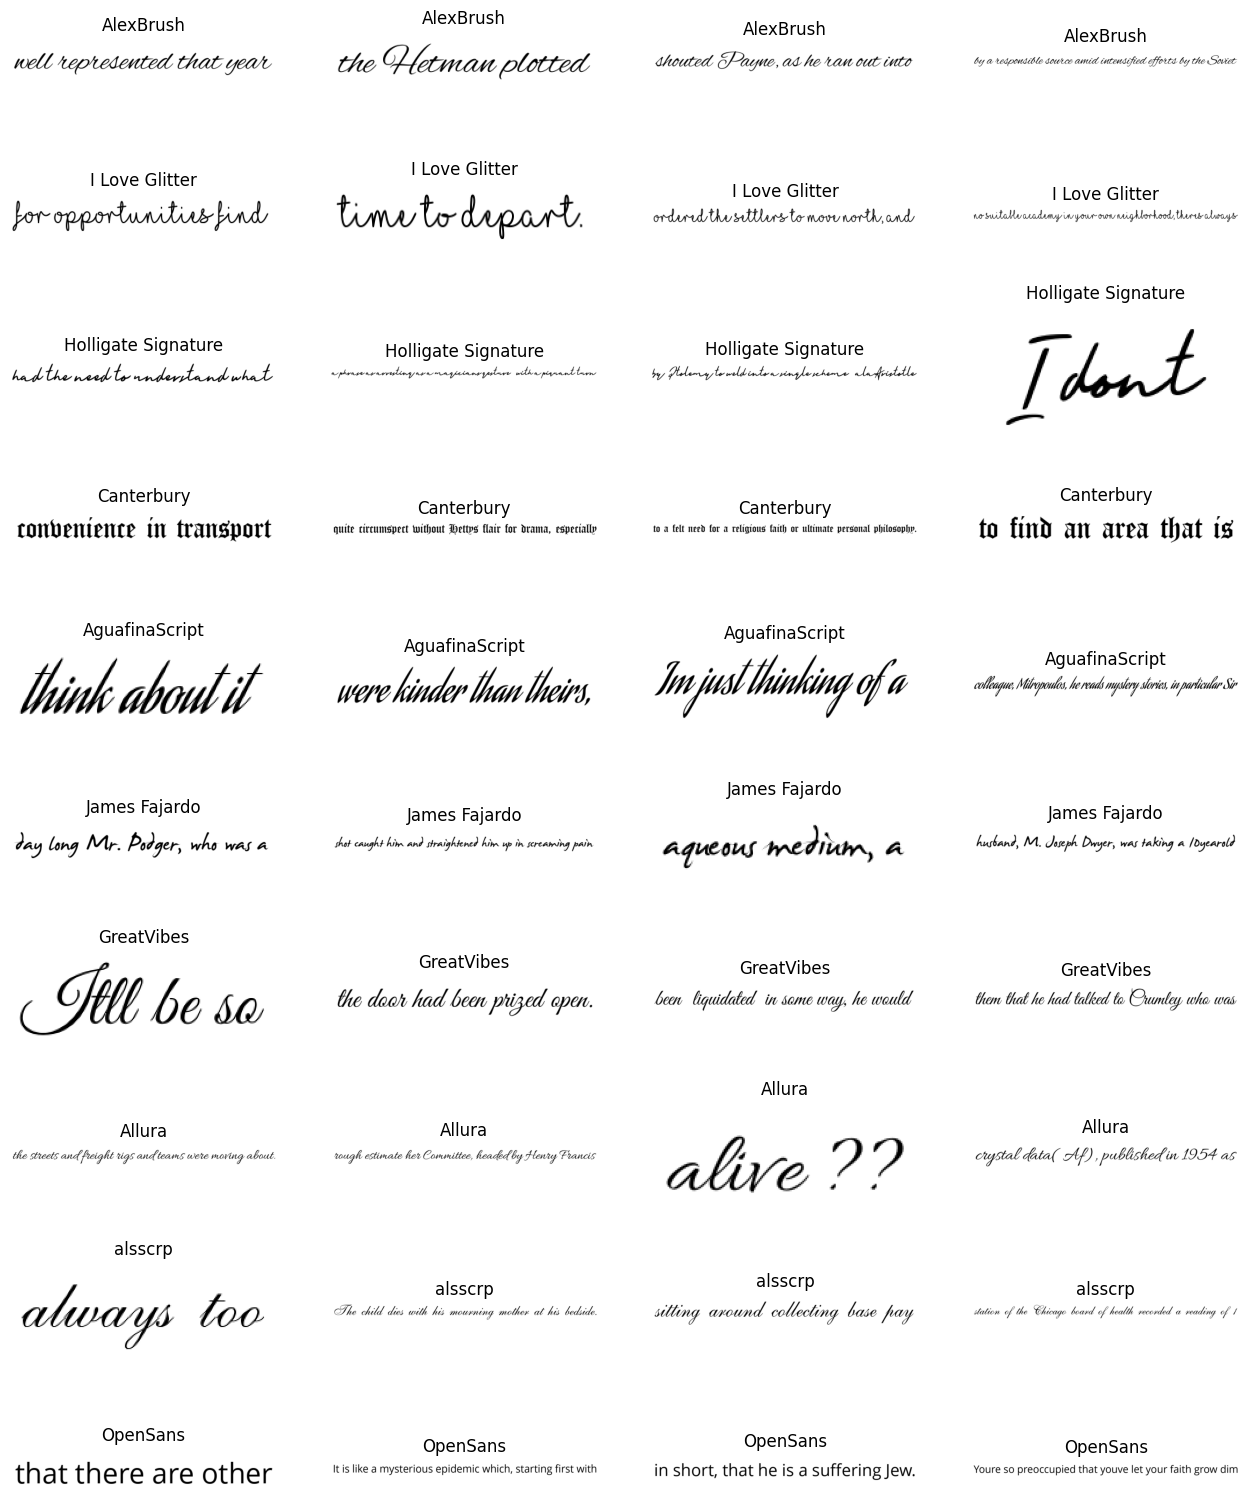

In [8]:
#plotting a few images from each font class
plt.figure(figsize=(20,20))
for i,folder in enumerate(folders):
    images=os.listdir(os.path.join(dataset_path,folder))
    for j in range(4):
        img=cv2.imread(os.path.join(dataset_path,folder,images[j]))
        plt.subplot(10,4,i*4+j+1)
        plt.imshow(img)
        plt.title(folder)
        plt.axis('off')

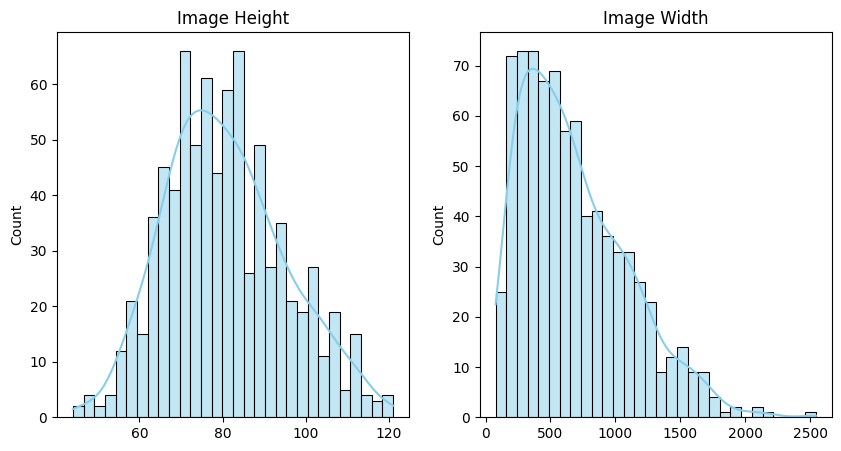

In [4]:
#plotting the dimnesions of the images
image_height=[]
image_width=[]
for folder in folders:
    for image in os.listdir(os.path.join(dataset_path,folder)):
        img=cv2.imread(os.path.join(dataset_path,folder,image))
        img_height,img_width,_=img.shape
        image_height.append(img_height)
        image_width.append(img_width)
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.histplot(image_height, bins=30, kde=True, color='skyblue', edgecolor='black')
plt.title('Image Height')
plt.subplot(1,2,2)
sns.histplot(image_width, bins=30, kde=True, color='skyblue', edgecolor='black')
plt.title('Image Width')
plt.show()


### Observations ###
    - Images height distribution is close to Gaussian distribution, with range from 40-120
    - Images width distribution is right skewed and most of the values are less than 1000. However, the range extends from 100 to 2500, indicating a wide span of values.

In [5]:
#print the 25th , 50th , 75th and 98th percentile of the image height and width to get an idea of the distribution

print(f'25th percentile of image height: {np.percentile(image_height,25)}')
print(f'50th percentile of image height: {np.percentile(image_height,50)}')
print(f'75th percentile of image height: {np.percentile(image_height,75)}')
print(f'98th percentile of image height: {np.percentile(image_height,98)}')
print('-'*50)
print(f'25th percentile of image width: {np.percentile(image_width,25)}')
print(f'50th percentile of image width: {np.percentile(image_width,50)}')
print(f'75th percentile of image width: {np.percentile(image_width,75)}')
print(f'98th percentile of image width: {np.percentile(image_width,98)}')


25th percentile of image height: 70.0
50th percentile of image height: 79.0
75th percentile of image height: 90.0
98th percentile of image height: 112.17999999999995
--------------------------------------------------
25th percentile of image width: 358.25
50th percentile of image width: 597.0
75th percentile of image width: 940.75
98th percentile of image width: 1658.659999999998


### Observations ###
    - The height and width of image varies a lot, and we have to do experimentation while resizing them before giving them input to CNN models.

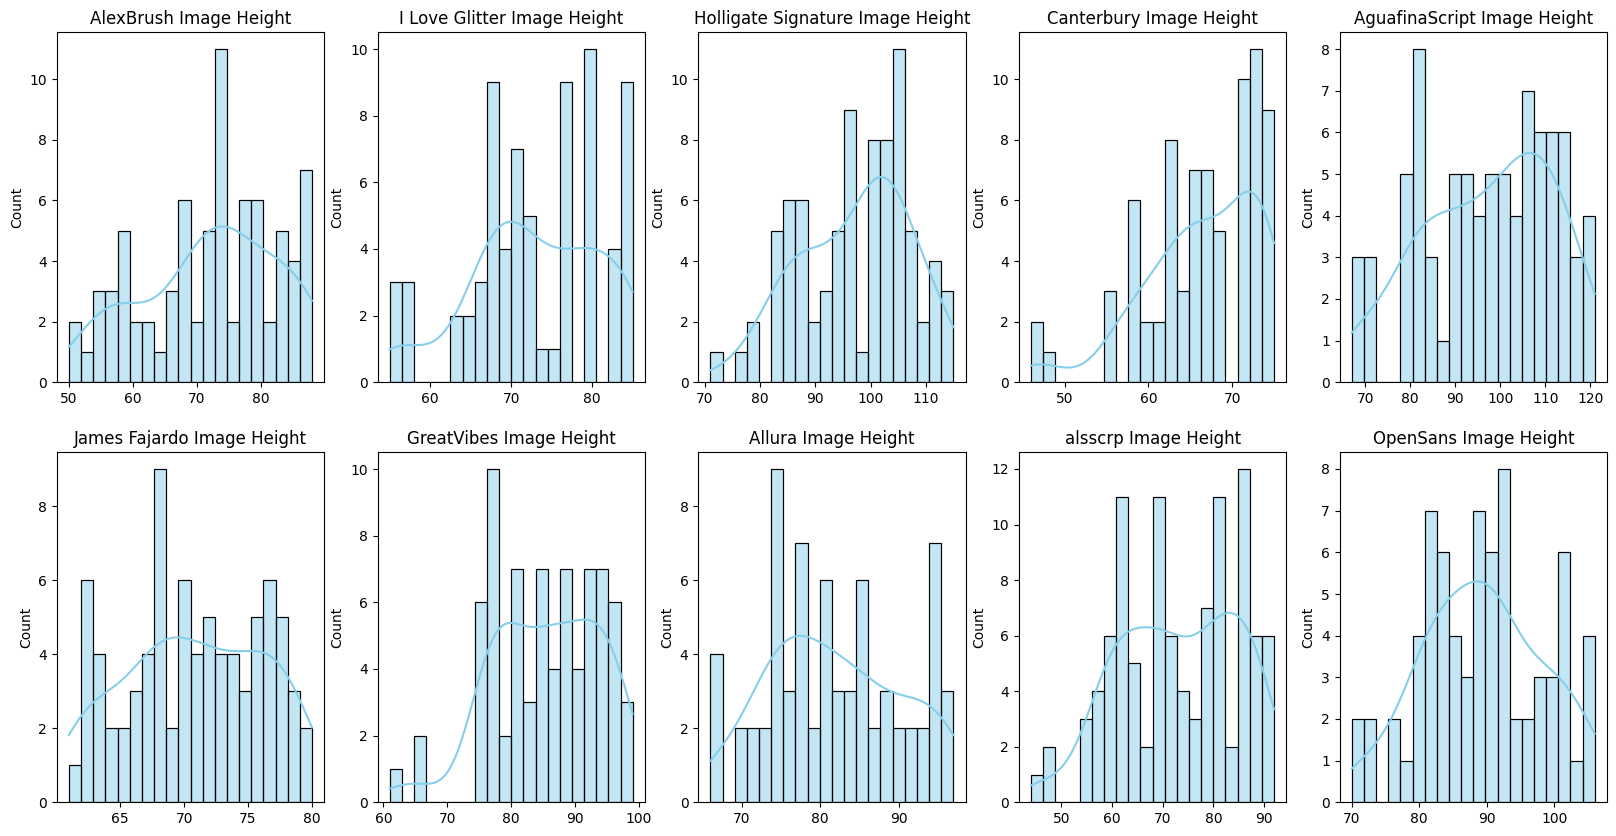

In [6]:
## getting height of all 10 different folders and plot them in subplots in a 2x5 grid
plt.figure(figsize=(20,10))
for i,folder in enumerate(folders):
    image_height=[]
    for image in os.listdir(os.path.join(dataset_path,folder)):
        img=cv2.imread(os.path.join(dataset_path,folder,image))
        img_height,img_width,_=img.shape
        image_height.append(img_height)
    plt.subplot(2,5,i+1)
    sns.histplot(image_height, bins=20, kde=True, color='skyblue', edgecolor='black')   
    plt.title(f'{folder} Image Height')


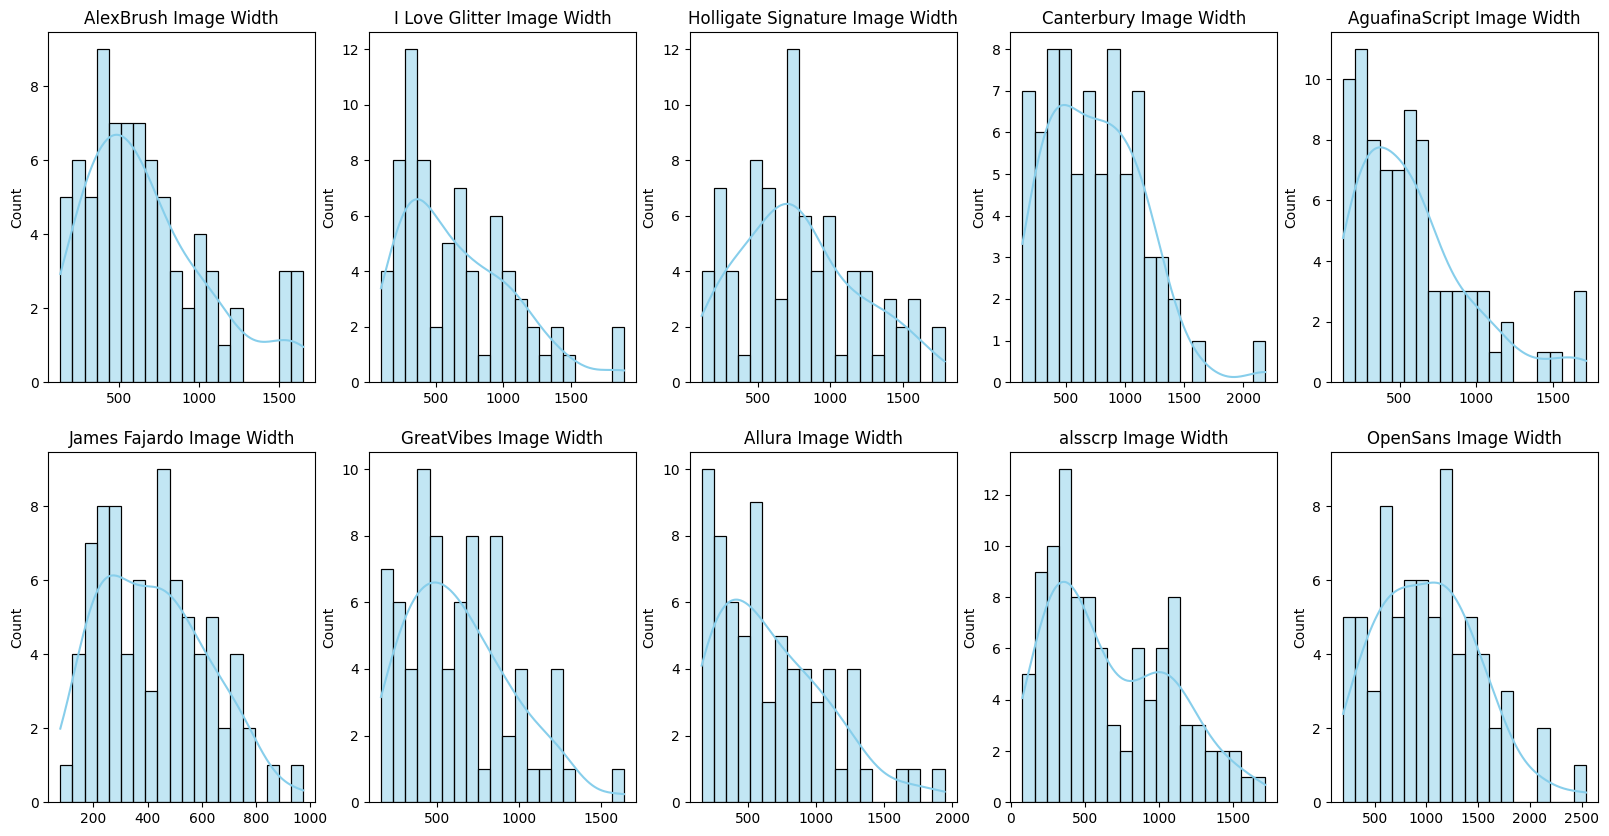

In [7]:
## getting width of all 10 different folders and plot them in subplots in a 2x5 grid
plt.figure(figsize=(20,10))
for i,folder in enumerate(folders):
    image_width=[]
    for image in os.listdir(os.path.join(dataset_path,folder)):
        img=cv2.imread(os.path.join(dataset_path,folder,image))
        img_height,img_width,_=img.shape
        image_width.append(img_width)
    plt.subplot(2,5,i+1)
    sns.histplot(image_width, bins=20, kde=True, color='skyblue', edgecolor='black')
    plt.title(f'{folder} Image Width')

### Observations
    - There is no visible correlation or consistent pattern between the height and width distributions of images within individual font classes.

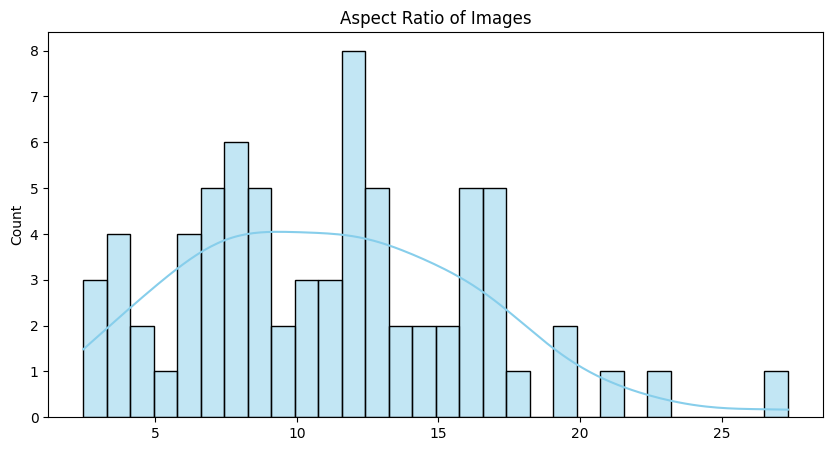

In [8]:
#plotting aspect ratio of all the images
plt.figure(figsize=(10,5))
aspect_ratio=[width/height for width,height in zip(image_width,image_height)]
sns.histplot(aspect_ratio, bins=30, kde=True, color='skyblue', edgecolor='black')
plt.title('Aspect Ratio of Images')
plt.show()

In [9]:
#print the percentiles of the aspect ratio
print(f'5th percentile of aspect ratio: {np.percentile(aspect_ratio,2)}')
print(f'25th percentile of aspect ratio: {np.percentile(aspect_ratio,25)}')
print(f'50th percentile of aspect ratio: {np.percentile(aspect_ratio,50)}')
print(f'75th percentile of aspect ratio: {np.percentile(aspect_ratio,75)}')
print(f'98th percentile of aspect ratio: {np.percentile(aspect_ratio,98)}')

5th percentile of aspect ratio: 2.9968421052631578
25th percentile of aspect ratio: 7.2823529411764705
50th percentile of aspect ratio: 11.261904761904763
75th percentile of aspect ratio: 14.839080459770114
98th percentile of aspect ratio: 21.788202764976962


### Observations
    - The dataset predominantly contains images with a landscape orientation, where the width is typically 3 to 21 times greater than the height.
    - The height and width relation for an image in totally random in training data.